<a href="https://colab.research.google.com/github/LeoFernanndes/portfolio/blob/master/RegressionOptimizationReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carprice Dataset Regression

## Data Visualization

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


path='https://raw.githubusercontent.com/LeoFernanndes/datasets/master/automobile_uci_1985.csv'
df = pd.read_csv(path)
df_raw = df.copy()

In [111]:
# checking features data types
df = pd.read_csv(path)
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [112]:
# taking a glampse on how the data set looks like
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Mean: 13207.129353233831
Median: 10295.0
Mode: 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64



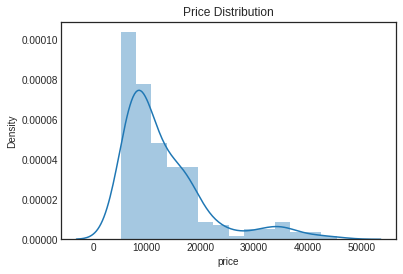

In [113]:
# price distribution
print("Mean: {}".format(df["price"].mean()))
print("Median: {}".format(df["price"].median()))
print("Mode: {}".format(df["price"].mode()))
print("")

plt.style.use("seaborn-white")
plt.title("Price Distribution")
sns.distplot(df["price"])
plt.show() 

Taking a glampse on price distribution we can spot some assimetries that are going to have effects on error distribution too. 
We can also see that some ways to handle mode are needed. Maybe binning could be a good solution


### Boxplots for comparison of categorical features

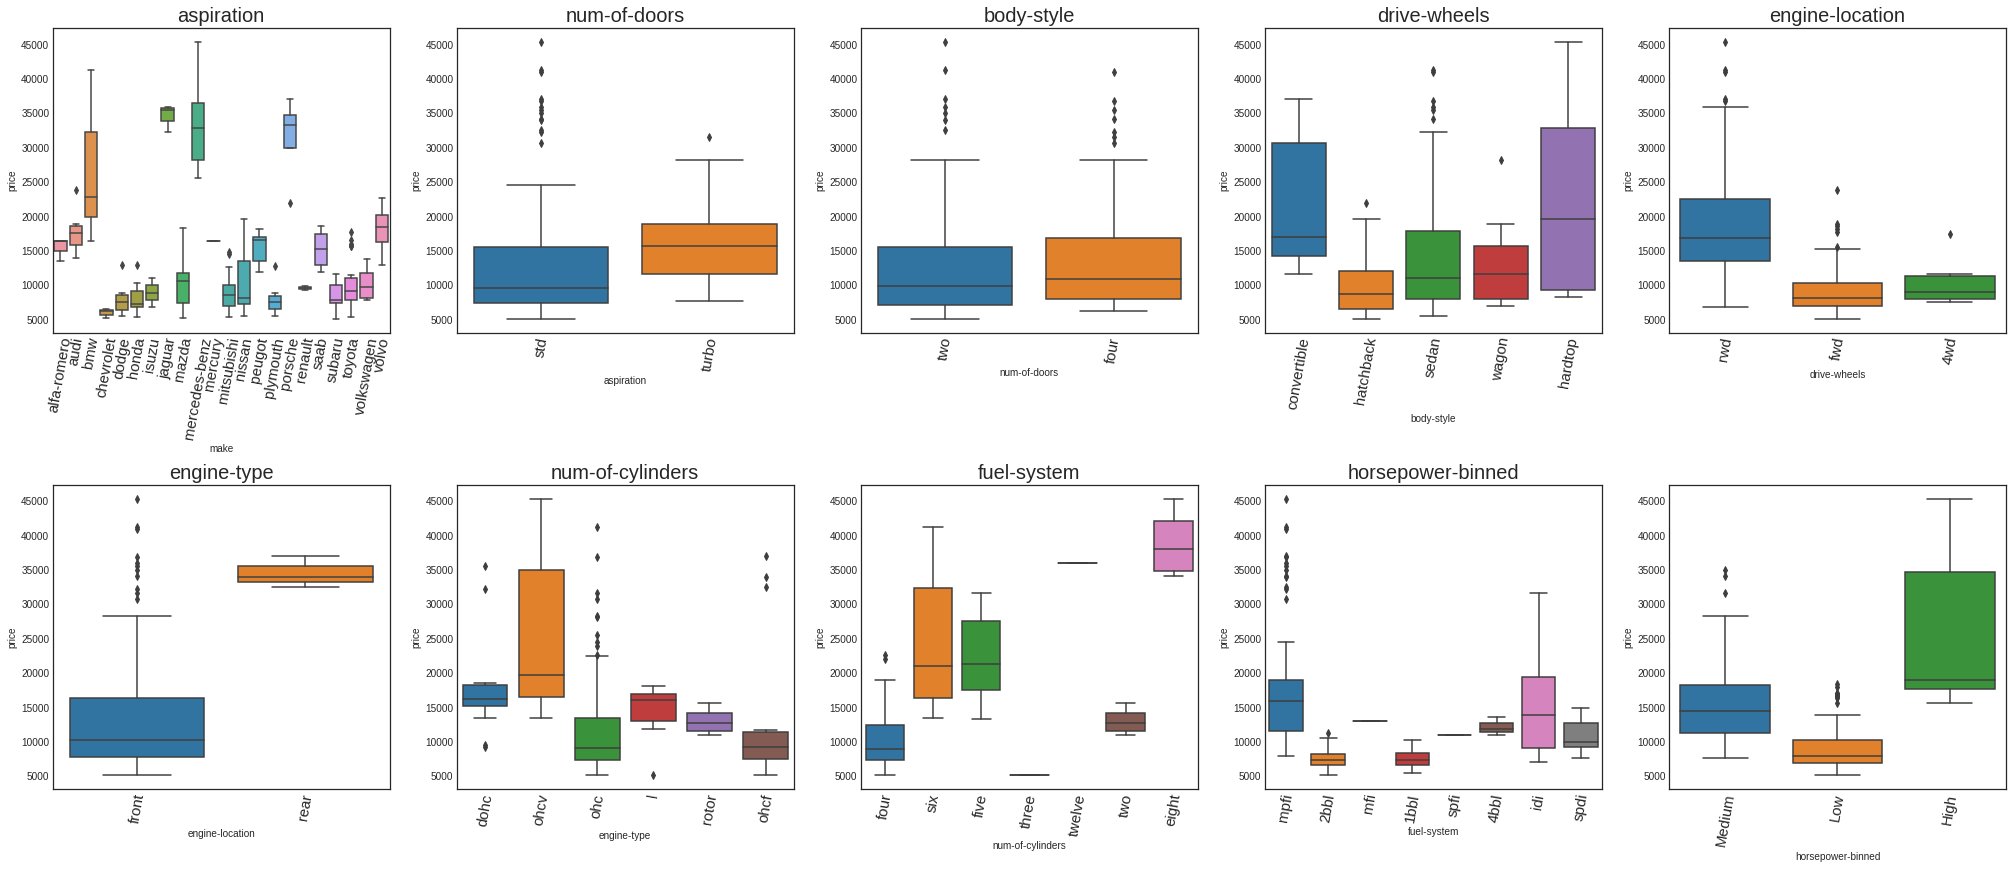

In [114]:
features = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']
       
nrows=2
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))
plt.subplots_adjust(hspace=0.5)
for idx in range(len(features)):
  plt.title("{}".format(features[idx]), fontsize=20)
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.boxplot(x=features[idx], y="price", data=df)
  plt.xticks(rotation=80, fontsize=font_size)

### 3th degree polynom regression to search for correlation

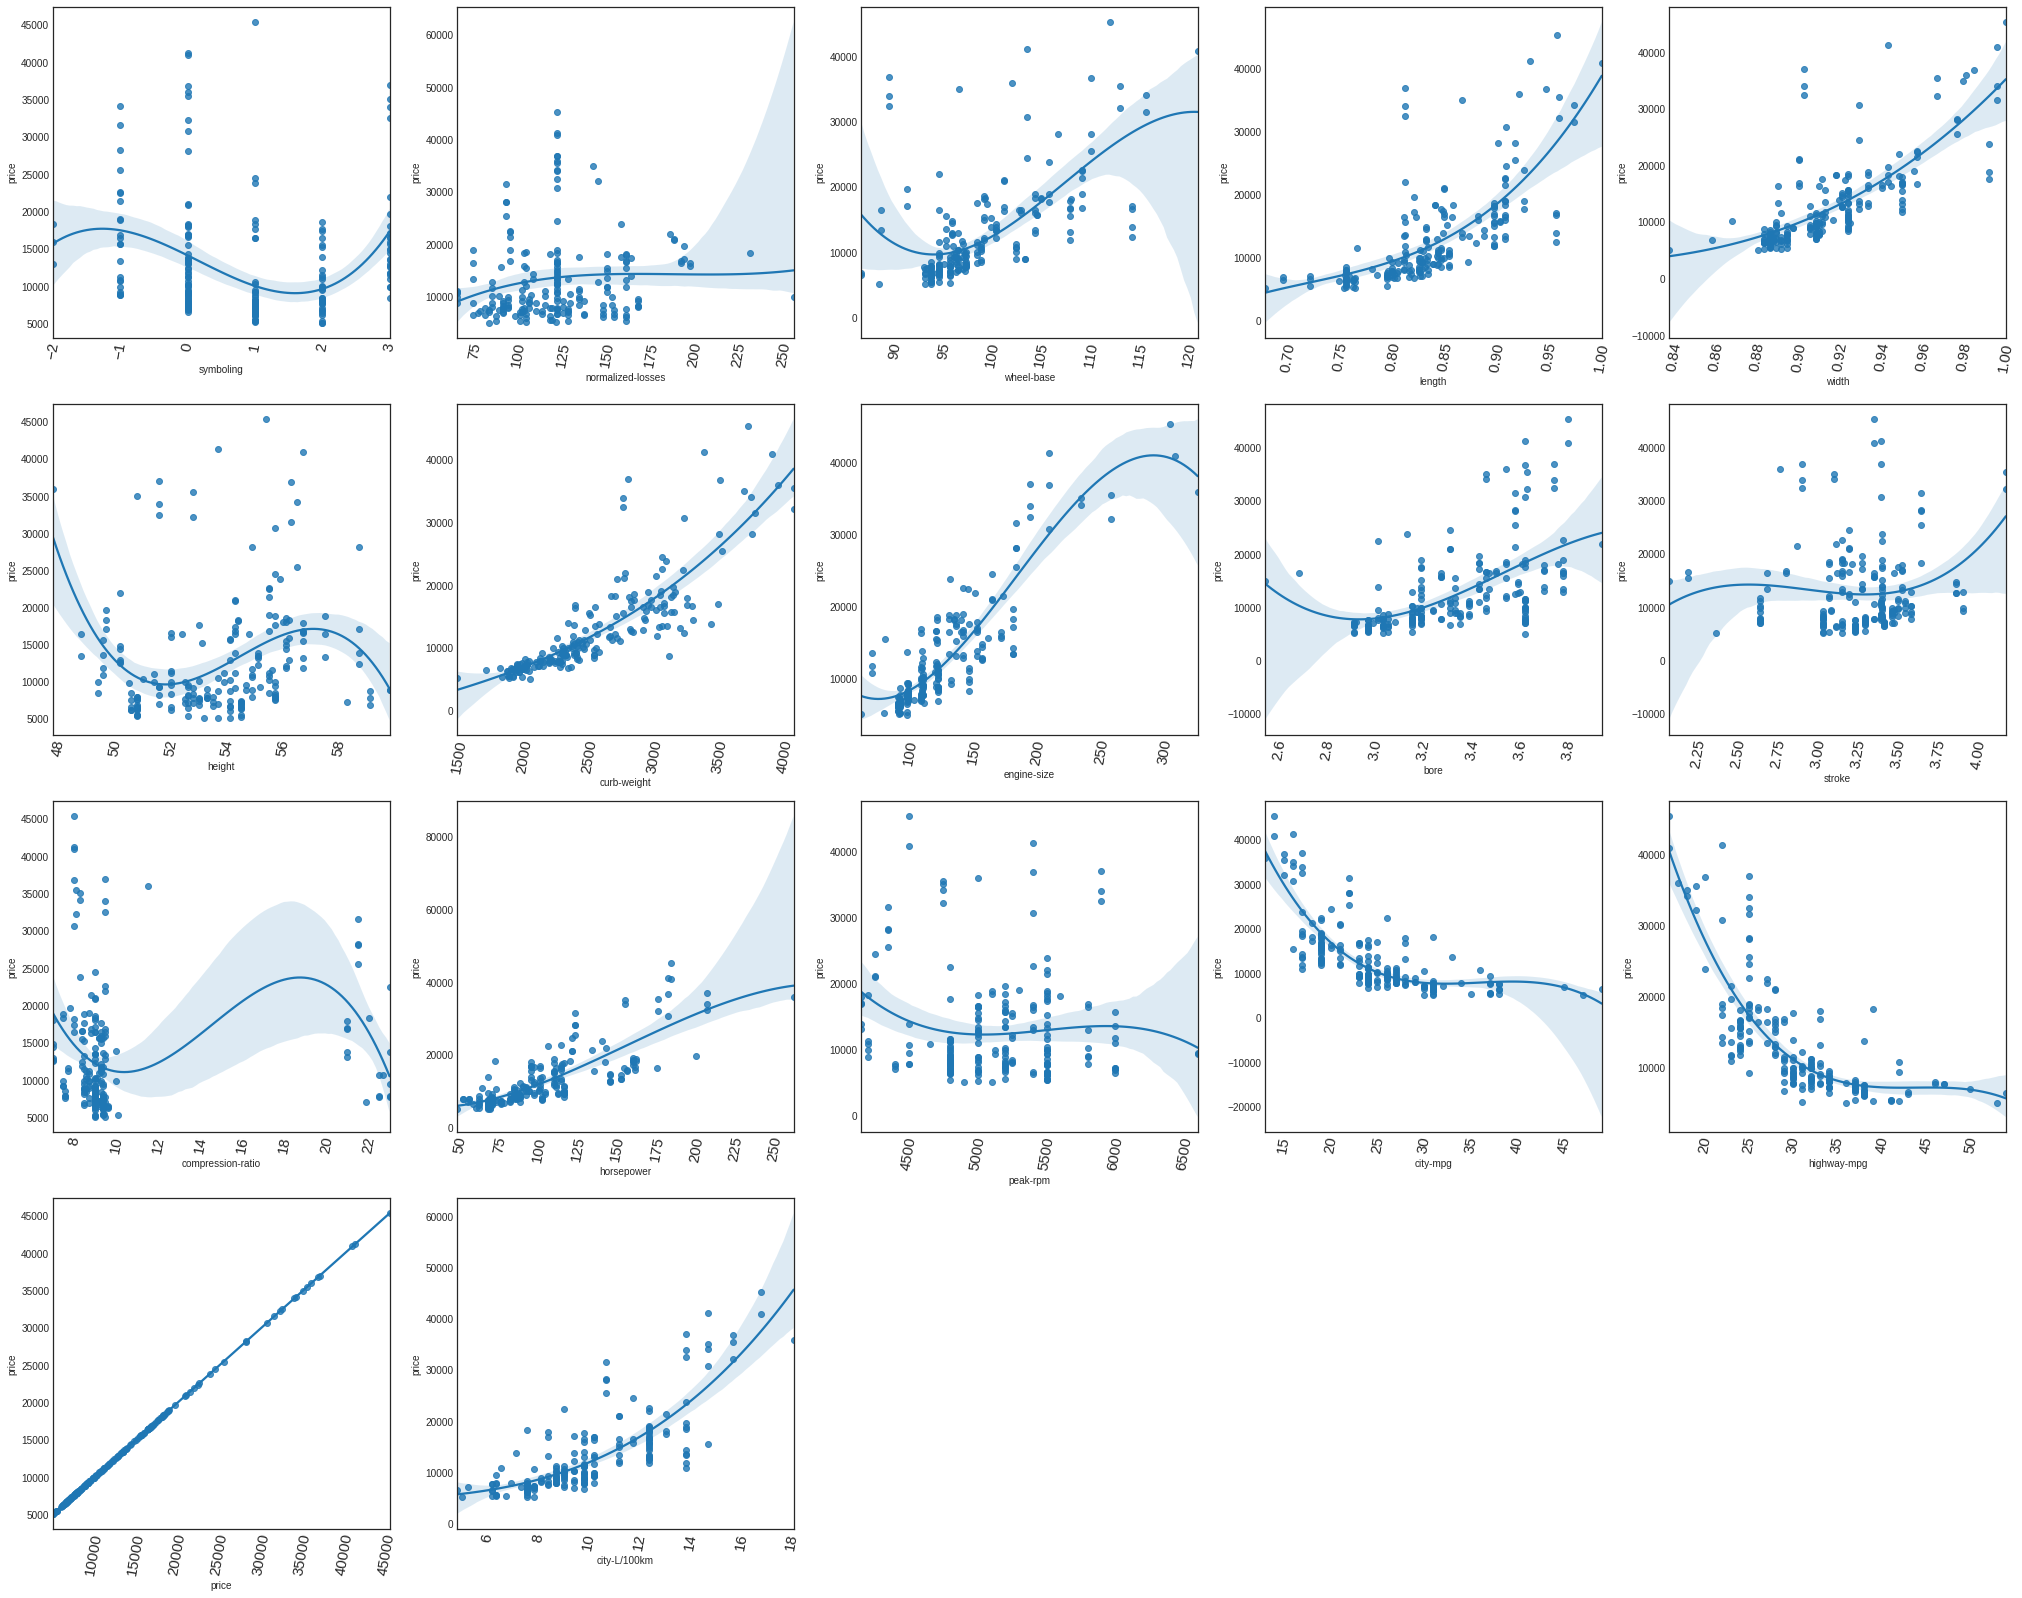

In [115]:
features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km']

nrows=4
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))

for idx in range(len(features)):
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.regplot(x=features[idx], y="price", order=3, data=df)
  plt.xticks(rotation=80, fontsize=font_size)

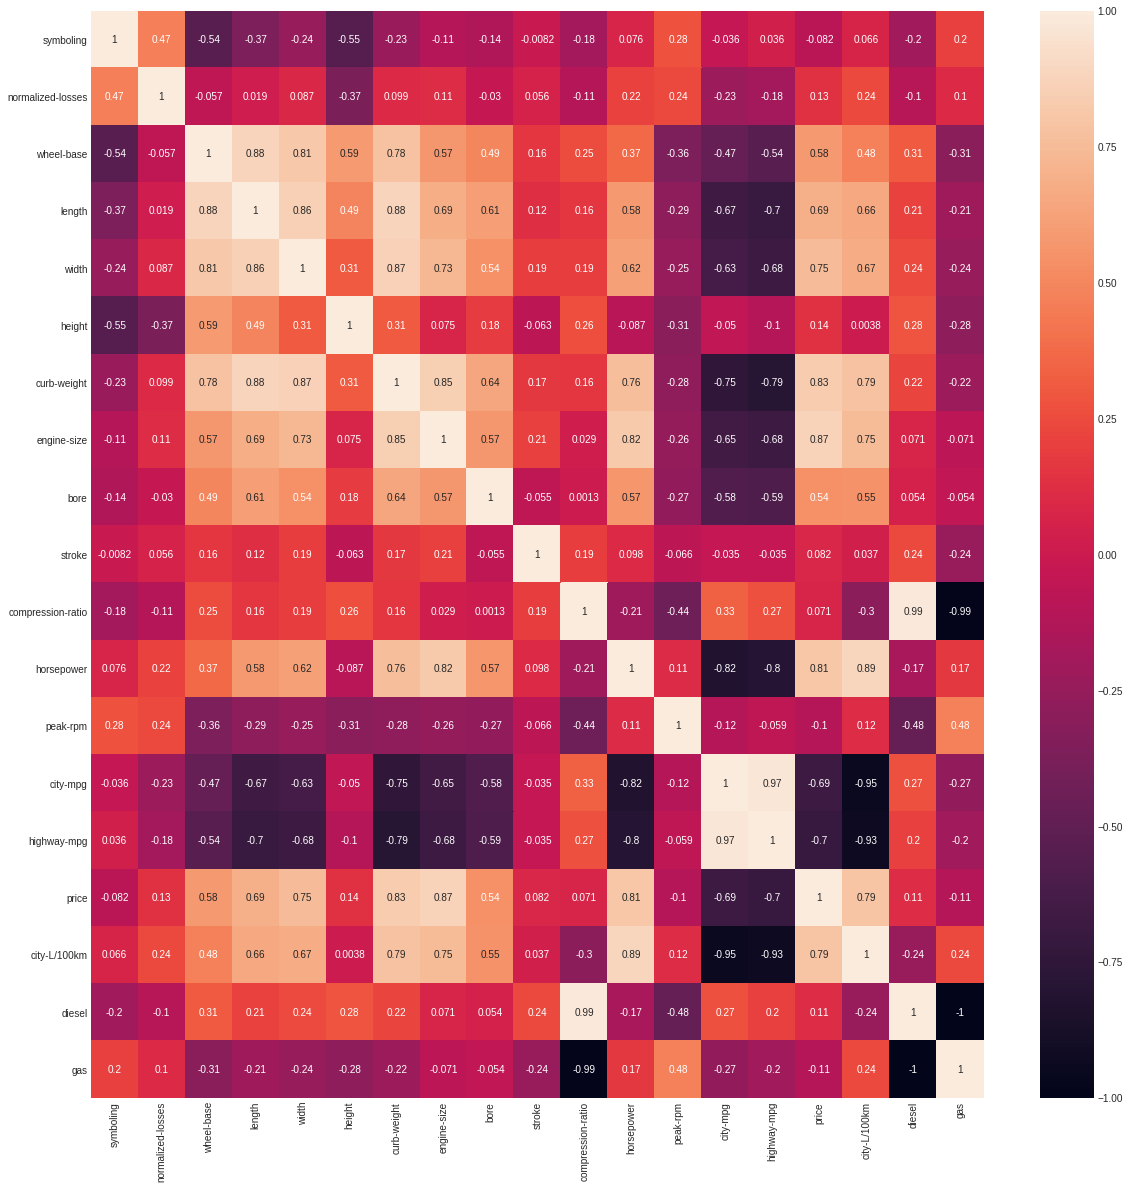

In [116]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

### Heatmap for numerical features that meet a certain threshold

In [117]:
limit = 0
correlated_features = df.corr()["price"].loc[(df.corr()["price"] > limit) | (df.corr()["price"] < -limit)]
correlated_features

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

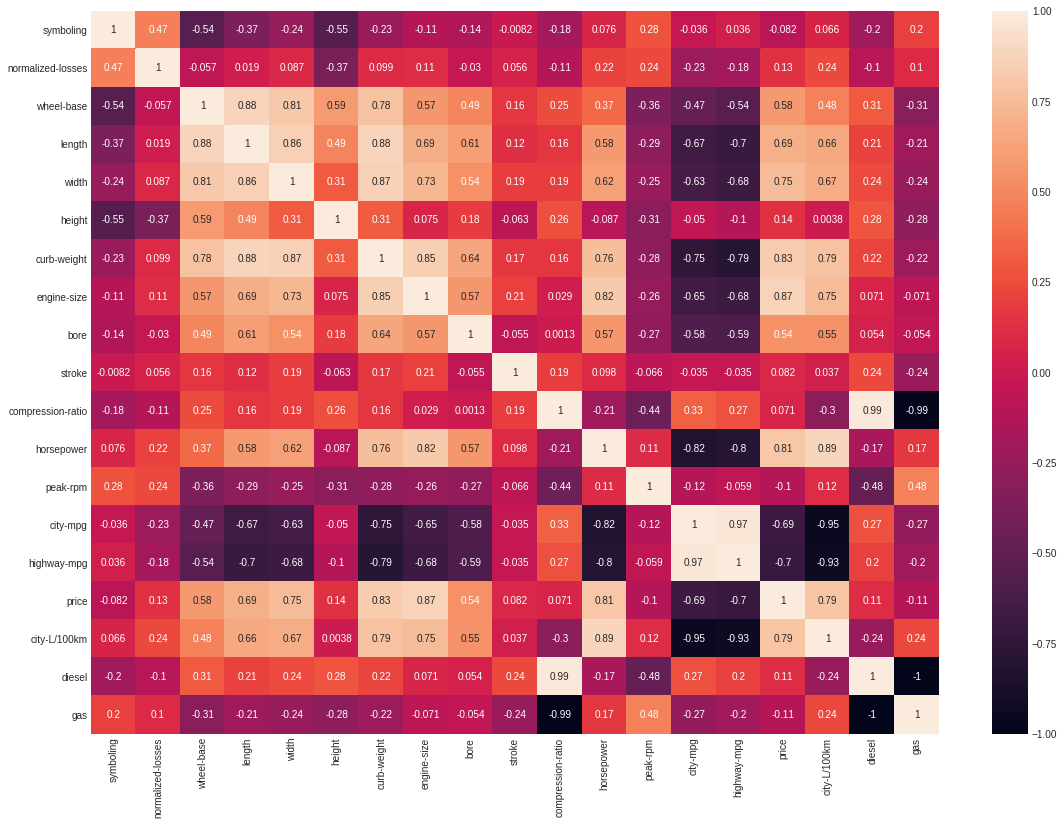

In [118]:
# correlation matrix for the selected features
corr = df[correlated_features.index].corr()
plt.figure(figsize=(len(correlated_features.index) * 1, len(correlated_features.index) * 0.7))
sns.heatmap(corr, annot=True)
plt.show()

## Data Preprocessing

Joining categorical features with those ones retrieved from filter of correlation coefficient limit above

In [119]:
correlated_features_ = list(correlated_features.index)

categorical_features_ = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']

for feature in  categorical_features_:
  if feature not in correlated_features_:
    correlated_features_.append(feature)

if "price" not in correlated_features_:
  correlated_features.append("price")

df = df[correlated_features_]
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
horsepower-binned    1
dtype: int64

### Clusterization on unlabeled data

2 clusters - Silh 0.5451060138200541 - DaviesBouldin 0.6418414785518632 - cal 342.3150195954476
3 clusters - Silh 0.6010837244546666 - DaviesBouldin 0.45775435000539333 - cal 557.4151951882483
4 clusters - Silh 0.5625019343808862 - DaviesBouldin 0.5021086032341234 - cal 778.0732696306561
5 clusters - Silh 0.5384292075375268 - DaviesBouldin 0.5305116548663734 - cal 906.4760492444711
6 clusters - Silh 0.5060306583998045 - DaviesBouldin 0.5818960132362478 - cal 984.6407422922879
7 clusters - Silh 0.4975431276923042 - DaviesBouldin 0.5967276484161078 - cal 1061.748818889444



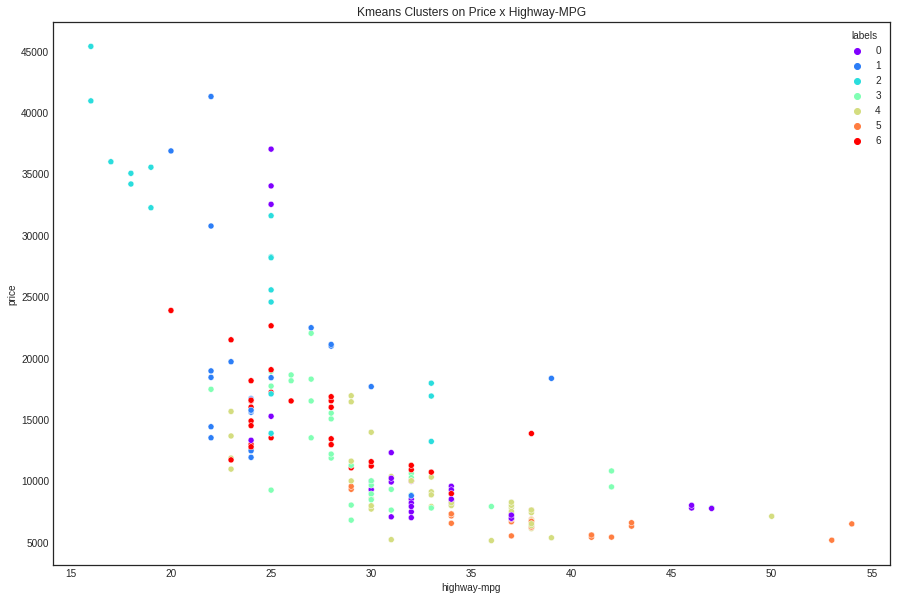

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


df.fillna(df.mean(), inplace=True)

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == "object":
    df[column] = le.fit_transform(df[column].astype("str"))

norm = Normalizer()
values = norm.fit_transform(df.drop(columns=["price"]).values)

n_clusters_ = 7

kmeans = KMeans(n_clusters=n_clusters_, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
df["labels"] = kmeans.labels_

plt.figure(figsize=(15, 10))
for n_clusters in np.arange(2, n_clusters_+1):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(values)

  labels = kmeans.labels_
  silhouette = silhouette_score(values, labels, metric="euclidean")
  dbs = davies_bouldin_score(values, labels)
  calinski = calinski_harabasz_score(values, labels)
  print("{} clusters - Silh {} - DaviesBouldin {} - cal {}".format(n_clusters, silhouette, dbs, calinski))

print("")

plt.title("Kmeans Clusters on Price x Highway-MPG")
sns.scatterplot(x="highway-mpg", y="price", data=df, hue="labels", palette="rainbow")
plt.show()

In [121]:
df = df.sample(frac=1)

X_val = df.drop(columns=["price"]).iloc[0:150]
y_val = df["price"].iloc[0:150]

X_test = df.drop(columns=["price"]).iloc[150:]
y_test = df["price"].iloc[150:]

## Pretty much the most simple regressor we can figure out

 naive regressor percentual Error: 0.2698478091999843 +/- 1.2744175509842763



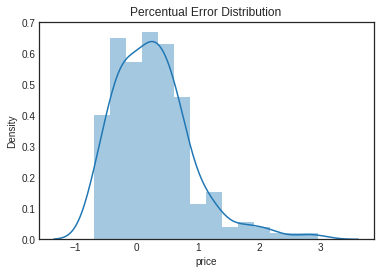

In [122]:
groupby = df.groupby(by=["engine-type"]).mean()

pred = []
for row in range(df.shape[0]):
  for line in range(groupby.shape[0]):
    if df["engine-type"][row] == groupby.iloc[line].name:
      pred.append(groupby.iloc[line].price)

error = np.sqrt((pred - df["price"])**2)
error2 = (pred - df["price"]) / df["price"]
print(" {} percentual Error: {} +/- {}".format("naive regressor", error2.mean(), 2 * error2.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_naive_regressor = error
error_naive_regressor2 = error2

## Linear Regression

 LinearRegression percentual Error: 0.00327780440384155 +/- 0.36890112990486834



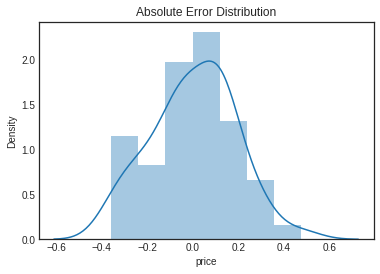

In [123]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error2)
plt.show()

error_linear_regressor = error
error_linear_regressor2 = error2

## Trying a little more generalization on the search

 RandomForestRegressor percentual Error: 0.003390458088886611 +/- 0.24733275539400865

 AdaBoostRegressor percentual Error: 0.07224037866574244 +/- 0.2968534525488484

 BaggingRegressor percentual Error: 0.0013325017470716498 +/- 0.2548768687397701



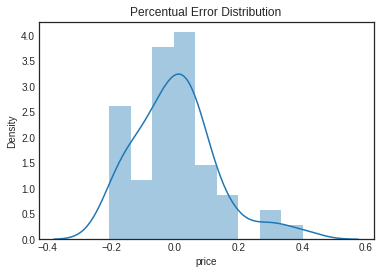

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

models = [
          RandomForestRegressor(),
          AdaBoostRegressor(),
          BaggingRegressor()
          ]

for model in models:
  model = model
  model.fit(X_val, y_val)
  pred = model.predict(X_test)
  error = np.sqrt((pred - y_test)**2)
  error2 = (pred - y_test) / y_test
  print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
  print("") 

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_ensemble_regressor = error
error_ensemble_regressor2 = error2

## Randomly looking through the best ensemble parameters grid combinations

 Optimized Ensemble percentual Error: 0.006674883448957366 +/- 0.23975290285930428



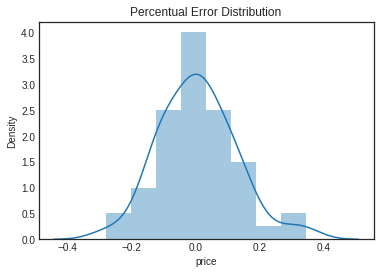

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor()
fold = KFold(n_splits=5, shuffle=True)

param = {"n_estimators": np.arange(100, 1000, 100),
         "max_depth": np.arange(1, 17),
         "criterion": ["mse", "mae"]}

search = RandomizedSearchCV(model, param_distributions=param, scoring="neg_mean_absolute_error", cv=fold, n_jobs=-1)
search.fit(X_val, y_val)


model = search.best_estimator_
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_optimized_ensemble_regressor = error
error_optimized_ensemble_regressor2 = error2

## The Neural Network approach using Keras

In [126]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor


model = Sequential()
model.add(Dense(1024, input_dim=X_val.shape[1], kernel_initializer="normal", activation="relu"))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mean_absolute_error", "mean_absolute_percentage_error"])
resultados = model.fit(X_val, y_val, epochs=100, validation_split=0.3)

pred_test_ = model.predict(X_test)
pred_test = [item[0] for item in pred_test_]
error = np.sqrt((pred_test - y_test)**2)
eror2 = (pred_test - y_test) / y_test

error_nn_regressor = error
error_nn_regressor_percent = error2
error_nn_regressor2 = error2

Epoch 1/100
4/4 [==============================] - 0s 45ms/step - loss: 144637392.0000 - mean_absolute_error: 9424.3486 - mean_absolute_percentage_error: 68.8573 - val_loss: 93639552.0000 - val_mean_absolute_error: 6076.5308 - val_mean_absolute_percentage_error: 35.5667
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 49017152.0000 - mean_absolute_error: 5543.3125 - mean_absolute_percentage_error: 57.6035 - val_loss: 84147544.0000 - val_mean_absolute_error: 7893.0166 - val_mean_absolute_percentage_error: 70.1604
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 58471116.0000 - mean_absolute_error: 6547.7695 - mean_absolute_percentage_error: 72.2458 - val_loss: 81487760.0000 - val_mean_absolute_error: 5835.1665 - val_mean_absolute_percentage_error: 38.3282
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 48504812.0000 - mean_absolute_error: 4685.0723 - mean_absolute_percentage_error: 37.9478 - val_loss: 102309240.0000 - va

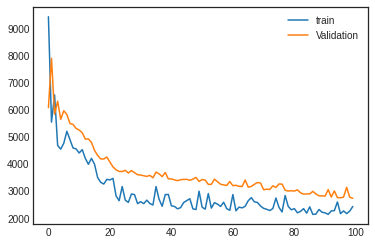


Absolute error test: 2065.9050245098038 +/- 4147.934396884032
Percentual error test: 0.006674883448957366 +/- 0.23975290285930428



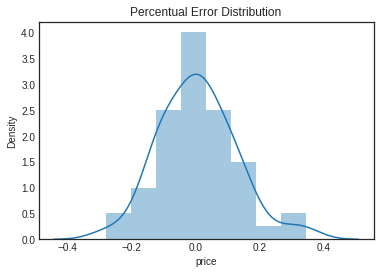

In [127]:
plt.plot(resultados.history["mean_absolute_error"], label="train")
plt.plot(resultados.history["val_mean_absolute_error"], label="Validation")
plt.legend()
plt.show()

print("")
print("Absolute error test: {} +/- {}".format(error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print("Percentual error test: {} +/- {}".format(error_nn_regressor_percent.mean(), 2 * error_nn_regressor_percent.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

## Exploring kmeans possibilities

Cluster 0: Absolute Error -0.02125380755400462 +/- 0.14130632558906855
Cluster 1: Absolute Error 0.07947329392057413 +/- 0.4987660723902496
Cluster 2: Absolute Error 0.025560081234208783 +/- 0.23709722531207997
Cluster 3: Absolute Error 0.004538177299376495 +/- 0.21339952127378664
Cluster 4: Absolute Error 0.021911719191802004 +/- 0.14008251515667675
Cluster 5: Absolute Error -0.12929319862494643 +/- 0.24120078363390154
Cluster 6: Absolute Error 0.07823261450672765 +/- 0.22386246822668424

 Optimized Ensemble absolute Error: 1437.585620915033 +/- 2998.197417138205
 Optimized Ensemble percentual Error: 0.0059995626745487345 +/- 0.26250627427009177



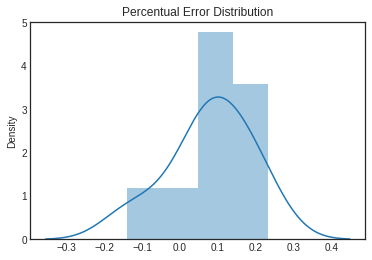

In [128]:
results = pd.DataFrame(columns=X_val.columns)
num_clus = []
mean = []
dispersion = []

reg = BaggingRegressor()

for cluster in range(n_clusters_):

  parcial = pd.DataFrame(columns=X_val.columns)

  X_val_ = X_val.loc[X_val["labels"] == cluster]
  y_val_ = df.loc[X_val_.index]["price"]
  
  X_test_ = X_test.loc[X_test["labels"] == cluster]
  y_test_ = df.loc[X_test_.index]["price"]

  if X_test_.shape[0] > 0:
    reg.fit(X_val_, y_val_)
    parcial = X_test_.copy()
    parcial["pred"] = reg.predict(X_test_)
    parcial["price"] = y_test_

    results = results.append(parcial)

    error_ = np.sqrt((parcial["pred"] - parcial["price"])**2)
    error_2 = (parcial["pred"] - parcial["price"]) / parcial["price"]

    print("Cluster {}: Absolute Error {} +/- {}".format(cluster, error_2.mean(), 2 * error_2.std()))
    
    num_clus.append(cluster)
    mean.append(error_.mean())
    dispersion.append(2 * error_.std())

cluster_results = pd.DataFrame({"Cluster": num_clus,
                                "Mean": mean,
                                "Dispersion": dispersion})
  
error = np.sqrt((results["pred"] - results["price"])**2)
error2 = (results["pred"] - results["price"]) / results["price"]
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error_2)
plt.show()

error_kmeansBagging_classifier = error
error_kmeansBagging_classifier2 = error2

In [129]:
cluster_results

,Cluster,Mean,Dispersion
0,0,605.437500,1310.831644
1,1,3679.780000,3874.518833
2,2,3222.220000,3719.778892
3,3,844.470833,1207.108835
4,4,560.958333,952.325030
5,5,1106.997917,2272.636276
6,6,1666.444444,2157.280939


## Kmeans on clusters whose error variance is sufficiently low

   Cluster         Mean   Dispersion
5        5  1106.997917  2272.636276
6        6  1666.444444  2157.280939
0        0   605.437500  1310.831644
3        3   844.470833  1207.108835
4        4   560.958333   952.325030

Ratio of unlabeled data: 0.2857142857142857

 Optimized Ensemble absolute Error: 946.5089430894309 +/- 1804.6331970498352
 Optimized Ensemble percentual Error: -0.00534607754565681 +/- 0.22851781772792576



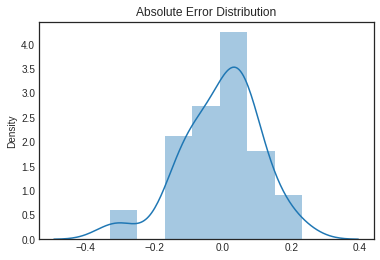

In [130]:
# filtering cluster whose variance is low
dispersion_treshold = 3000
cluster_results = cluster_results.sort_values(by=["Dispersion"], ascending=False)
cluster_results_ = cluster_results.loc[cluster_results["Dispersion"] < dispersion_treshold]
low_variance = cluster_results_["Cluster"].values

filtered_results = results[results["labels"].isin(low_variance)]

error = np.sqrt((filtered_results["pred"] - filtered_results["price"])**2)
error2 = (filtered_results["pred"] - filtered_results["price"]) / filtered_results["price"]

print(cluster_results_)
print("")
print("Ratio of unlabeled data: {}".format((cluster_results.shape[0] - cluster_results_.shape[0]) / cluster_results.shape[0]))
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error2)
plt.show()

error_filtered_kmeansBagging_classifier = error
error_filtered_kmeansBagging_classifier2 = error2

   Cluster     Mean   Dispersion
1        1  3679.78  3874.518833
2        2  3222.22  3719.778892



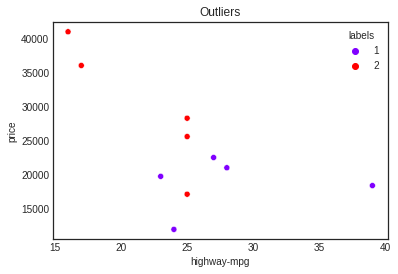

In [131]:
high_variance = [cluster for cluster in cluster_results["Cluster"].values if cluster not in low_variance]
outliers = results[results["labels"].isin(high_variance)]

cluster_results__ = cluster_results.loc[cluster_results["Dispersion"] > dispersion_treshold]
print(cluster_results__)
print("")

plt.title("Outliers")
sns.scatterplot(x="highway-mpg", y="price", data=outliers, hue="labels", palette="rainbow")
plt.show()

In [132]:
plt.style.available # to see available background style for plt

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

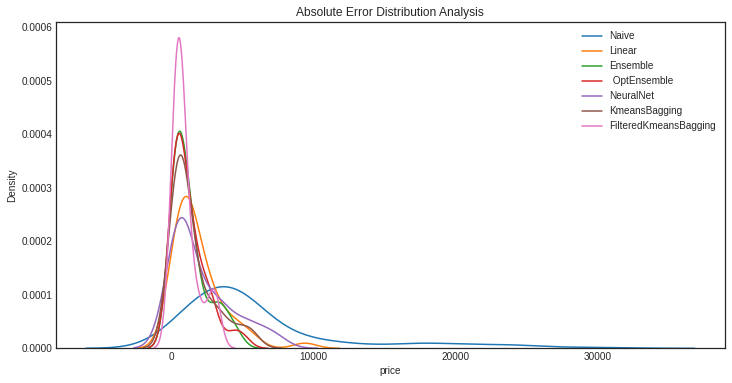


 Naive regressor absolute Error: 5957.864982778419 +/- 11698.346527899019
 Linear regressor absolute Error: 1853.1172081446591 +/- 3572.9377107123496
 Ensemble regressor absolute Error: 1248.6641830065362 +/- 2458.47181839879
 Optimized Ensemble regressor absolute Error: 1215.4686786270063 +/- 2425.07454017911
 NeuralNet regressor absolute error: 2065.9050245098038 +/- 4147.934396884032
 Kmeans Bagging regressor absolute error: 1437.585620915033 +/- 2998.197417138205
 Filtered Kmeans Bagging regressor absolute error: 946.5089430894309 +/- 1804.6331970498352


In [133]:
tamanho = 6
#plt.style.available # to see available background style for plt
plt.style.use("seaborn-white")
plt.figure(figsize=(2 * tamanho, 1 * tamanho))
sns.distplot(error_naive_regressor, hist=False, label="Naive")
sns.distplot(error_linear_regressor, hist=False, label="Linear")
sns.distplot(error_ensemble_regressor, hist=False, label="Ensemble")
sns.distplot(error_optimized_ensemble_regressor, hist=False, label=" OptEnsemble")
sns.distplot(error_nn_regressor, hist=False, label="NeuralNet")
sns.distplot(error_kmeansBagging_classifier, hist=False, label="KmeansBagging")
sns.distplot(error_filtered_kmeansBagging_classifier, hist=False, label="FilteredKmeansBagging")
plt.title("Absolute Error Distribution Analysis")
plt.legend()
plt.show()

print("")
print(" {} absolute Error: {} +/- {}".format("Naive regressor", error_naive_regressor.mean(), 2 * error_naive_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Linear regressor", error_linear_regressor.mean(), 2 * error_linear_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Ensemble regressor", error_ensemble_regressor.mean(), 2 * error_ensemble_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble regressor", error_optimized_ensemble_regressor.mean(), 2 * error_optimized_ensemble_regressor.std()))
print(" {} absolute error: {} +/- {}".format("NeuralNet regressor", error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print(" {} absolute error: {} +/- {}".format("Kmeans Bagging regressor", error_kmeansBagging_classifier.mean(), 2 * error_kmeansBagging_classifier.std()))
print(" {} absolute error: {} +/- {}".format("Filtered Kmeans Bagging regressor", error_filtered_kmeansBagging_classifier.mean(), 2 * error_filtered_kmeansBagging_classifier.std()))

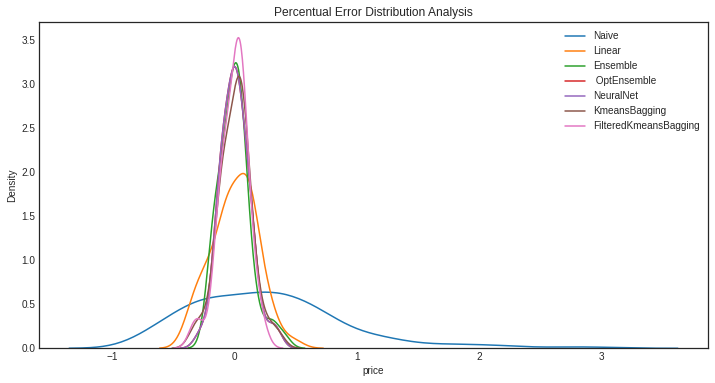


 Naive regressor percentual Error: 0.2698478091999843 +/- 1.2744175509842763
 Linear regressor percentual Error: 0.00327780440384155 +/- 0.36890112990486834
 Ensemble regressor percentual Error: 0.0013325017470716498 +/- 0.2548768687397701
 Optimized Ensemble regressor percentual Error: 0.006674883448957366 +/- 0.23975290285930428
 NeuralNet regressor percentual error: 0.006674883448957366 +/- 0.23975290285930428
 Kmeans Bagging regressor percentual error: 0.0059995626745487345 +/- 0.26250627427009177
 Filtered Kmeans Bagging regressor percentual error: -0.00534607754565681 +/- 0.22851781772792576


In [134]:
tamanho = 6
#plt.style.available # to see available background style for plt
plt.style.use("seaborn-white")
plt.figure(figsize=(2 * tamanho, 1 * tamanho))
sns.distplot(error_naive_regressor2, hist=False, label="Naive")
sns.distplot(error_linear_regressor2, hist=False, label="Linear")
sns.distplot(error_ensemble_regressor2, hist=False, label="Ensemble")
sns.distplot(error_optimized_ensemble_regressor2, hist=False, label=" OptEnsemble")
sns.distplot(error_nn_regressor2, hist=False, label="NeuralNet")
sns.distplot(error_kmeansBagging_classifier2, hist=False, label="KmeansBagging")
sns.distplot(error_filtered_kmeansBagging_classifier2, hist=False, label="FilteredKmeansBagging")
plt.title("Percentual Error Distribution Analysis")
plt.legend()
plt.show()

print("")
print(" {} percentual Error: {} +/- {}".format("Naive regressor", error_naive_regressor2.mean(), 2 * error_naive_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Linear regressor", error_linear_regressor2.mean(), 2 * error_linear_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Ensemble regressor", error_ensemble_regressor2.mean(), 2 * error_ensemble_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble regressor", error_optimized_ensemble_regressor2.mean(), 2 * error_optimized_ensemble_regressor2.std()))
print(" {} percentual error: {} +/- {}".format("NeuralNet regressor", error_nn_regressor2.mean(), 2 * error_nn_regressor2.std()))
print(" {} percentual error: {} +/- {}".format("Kmeans Bagging regressor", error_kmeansBagging_classifier2.mean(), 2 * error_kmeansBagging_classifier2.std()))
print(" {} percentual error: {} +/- {}".format("Filtered Kmeans Bagging regressor", error_filtered_kmeansBagging_classifier2.mean(), 2 * error_filtered_kmeansBagging_classifier2.std()))

As a good practice, we usually use 2 standard deviations below and above mean in a normally distributed variable to encapsulate 95.44% of the possible results within the confidence interval, but we can also use z test to verify the limits for a given confidence interval.

z = ( x - mi ) / sigma 

x = 1.29 * 0.1324 + 0.023
x = 0.1937

So if we are willing to reduce confidence interval in a trade off between accuracy and precision, we can say that 90% of the results will be inside 0.023 +- 0.1937 considering the optmized ensemble regressor.

If we take on account a different approach filtering the clusters with high prediction variance to be analyzed by a specialist and create a model to predict the more well behaviored data, we can narrow the bell curve to 0.024 +- 0.1926 preserving the 95.44% of confidence